## **Student grade Prediction** ##

The objective of this project is to predict the grades of the students based on some features

### **Data Collection** ###
Dataset Link : https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/student-mat.csv")
print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### **Exploratory Data Analysis** ###

**About the Dataset**

The dataset contains the information about the students of two schools GP and MS.<br>
**Features** <br>
1.  school : binary GP or MS
2.  sex : binary F or M
3.  age : numeric
4.  .
5.  .
32. G2 : grade numeric
---
**output** <br>
33.  G3: grade numeric





summary statistics

In [4]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

**Data Visualization**

<ipython-input-6-0977dfda9705>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.countplot(data=df, x='G3', palette='viridis')


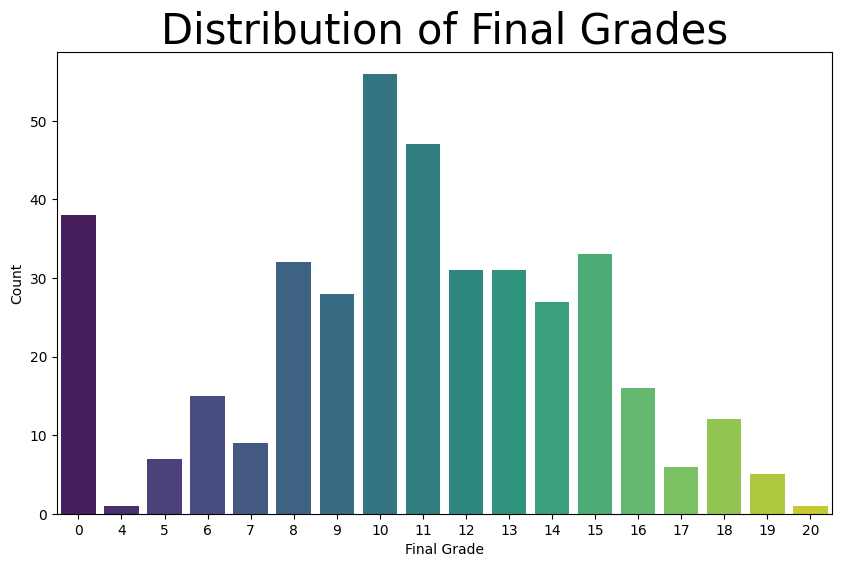

In [6]:
plt.figure(figsize=(10, 6))
b = sns.countplot(data=df, x='G3', palette='viridis')
b.axes.set_title("Distribution of Final Grades", fontsize=30)
b.set_xlabel("Final Grade",fontsize=10)
b.set_ylabel("Count",fontsize=10)
plt.show()

### **Data Preprocessing** ###


#### **a)Find Null values** ####
No null values

In [7]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### **b)Remove unnecessary features** ####


In [9]:
df.drop(["school", "age","address"],axis=1,inplace=True)
df.head()

,sex,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,GT3,A,4,4,at_home,teacher,course,mother,2,...,4,3,4,1,1,3,6,5,6,6
1,F,GT3,T,1,1,at_home,other,course,father,1,...,5,3,3,1,1,3,4,5,5,6
2,F,LE3,T,1,1,at_home,other,other,mother,1,...,4,3,2,2,3,3,10,7,8,10
3,F,GT3,T,4,2,health,services,home,mother,1,...,3,2,2,1,1,5,2,15,14,15
4,F,GT3,T,3,3,other,other,home,father,1,...,4,3,2,1,2,5,4,6,10,10


In [10]:
df.columns

Index(['sex', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### **c)Mapping** ####

In [11]:
d = { 'yes':1,'no':0 }
df['schoolsup'] = df['schoolsup'].map(d)
df['famsup'] = df['famsup'].map(d)
df['paid'] = df['paid'].map(d)
df['activities'] = df['activities'].map(d)
df['nursery'] = df['nursery'].map(d)
df['higher'] = df['higher'].map(d)
df['internet'] = df['internet'].map(d)
df['romantic'] = df['romantic'].map(d)

In [12]:
d = {'F':1,'M':0}
df['sex'] = df['sex'].map(d)

d = {'home':0, 'reputation':1, 'course':2, 'other':3}
df['reason'] = df['reason'].map(d)

d = {'mother':0 , 'father':1 , 'other': 2}
df['guardian'] = df['guardian'].map(d)

d = {'LE3':0, 'GT3':1}
df['famsize'] = df['famsize'].map(d)

d = {'A':0, 'T':1}
df['Pstatus'] = df['Pstatus'].map(d)

d = {'at_home':0,'health':1,'services':2,'teacher':3,'other':4}
df['Mjob'] = df['Mjob'].map(d)
df['Fjob'] = df['Fjob'].map(d)

df.head()

,sex,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,4,4,0,3,2,0,2,...,4,3,4,1,1,3,6,5,6,6
1,1,1,1,1,1,0,4,2,1,1,...,5,3,3,1,1,3,4,5,5,6
2,1,0,1,1,1,0,4,3,0,1,...,4,3,2,2,3,3,10,7,8,10
3,1,1,1,4,2,1,2,0,0,1,...,3,2,2,1,1,5,2,15,14,15
4,1,1,1,3,3,4,4,0,1,1,...,4,3,2,1,2,5,4,6,10,10


#### **d)Feature Extraction** ####

In [13]:
x = df.drop("G3",axis=1)
y = df['G3']

#### **e)Train-test split** ####

In [14]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=21)
train_x.head()

,sex,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
44,1,0,1,2,2,4,0,2,1,2,...,0,4,3,3,2,2,5,14,10,10
143,1,0,1,1,1,0,0,2,0,1,...,0,3,4,4,3,3,1,2,14,14
53,1,1,1,4,4,2,2,2,0,1,...,0,3,3,4,2,3,5,0,8,10
102,0,1,1,4,4,2,4,2,0,1,...,0,5,3,3,1,1,5,4,10,13
388,1,0,1,3,1,3,2,2,0,1,...,0,4,3,4,1,1,1,0,7,9


### **Model Implementation** ###

#### **Training** ####

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

#### **Prediction** ####

In [16]:
predict_y = model.predict(test_x)
print(predict_y)

[ 7.74214342 18.37266112  8.92150802 13.4177207   8.9003699  10.56509707
  4.4240763  14.43912818 16.4089491  -1.16659731  8.47633279 14.12380432
 15.11732597 10.70291169  9.8216325  13.05412256 13.24601121 18.62946213
  9.25935901 11.01903696 10.1328274   8.88346267 20.05812845 -0.67620434
 10.5436534   6.66539167  8.42702177 18.84441715 10.06128977 15.3919394
 14.52052473 13.71106136  6.56692076 14.99112532  4.73829376  5.95728608
  8.04339294  9.20121561 10.89142956 11.52545086 11.63093363  7.83744016
  7.64418011  8.17761188  6.96866881 14.8129274   4.18652514  9.18078438
 14.35931271 15.63672913 14.96524198  9.00259239  6.12128274  5.91216385
  5.10221517 11.39322932  9.97462506  6.93345702 18.37326306  8.7252571
 -0.18874852  6.70413096 15.27221145  5.15991833 15.51925057  5.75507841
  7.24440008 10.12740661 12.99618612  8.72475171 18.92752578  9.03723636
 10.82201539 10.61022329  8.38178387  3.5451002  10.56688463  8.48455867
 -1.47574724 12.79031479  8.18908988 14.59235299 11.7

#### **Evaluation** ####

In [17]:
test_accuracy = model.score(test_x,test_y)
train_accuracy = model.score(train_x,train_y)
print("Train accuracy = ",train_accuracy,"test accuracy = ",test_accuracy)

Train accuracy =  0.8468212801071648 test accuracy =  0.8144750277155215


### **Detect and Remove outliers** ###

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


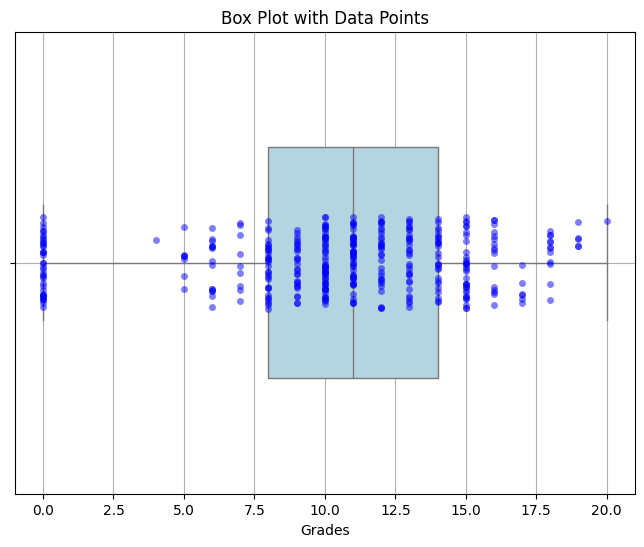

8.0

In [18]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='G3', data=df, orient='v', width=0.5, color='lightblue')

# Add data points with stripplot
sns.stripplot(x='G3', data=df, jitter=True, alpha=0.5, color='blue')

plt.title('Box Plot with Data Points')
plt.xlabel('Grades')
plt.grid(True)
plt.show()

df['G3'].quantile(0.25)

In [19]:
q1 = df['G3'].quantile(0.25)
q3 = df['G3'].quantile(0.75)

iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['G3'] > lower_bound) & (df['G3'] < upper_bound)]
df

,sex,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,4,4,0,3,2,0,2,...,4,3,4,1,1,3,6,5,6,6
1,1,1,1,1,1,0,4,2,1,1,...,5,3,3,1,1,3,4,5,5,6
2,1,0,1,1,1,0,4,3,0,1,...,4,3,2,2,3,3,10,7,8,10
3,1,1,1,4,2,1,2,0,0,1,...,3,2,2,1,1,5,2,15,14,15
4,1,1,1,3,3,4,4,0,1,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,2,2,2,2,2,2,1,...,5,5,4,4,5,4,11,9,9,9
391,0,0,1,3,1,2,2,2,0,2,...,2,4,5,3,4,2,3,14,16,16
392,0,1,1,1,1,4,4,2,2,1,...,5,5,3,3,3,3,3,10,8,7
393,0,0,1,3,2,2,4,2,0,3,...,4,4,1,3,4,5,0,11,12,10


### **Retrain the Model** ####

In [20]:
x = df.drop("G3",axis=1)
y = df['G3']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=21)
model = LinearRegression()
model.fit(train_x,train_y)
test_accuracy = model.score(test_x,test_y)
train_accuracy = model.score(train_x,train_y)
print("Train accuracy = ",train_accuracy,"test accuracy = ",test_accuracy)

Train accuracy =  0.8468212801071648 test accuracy =  0.8144750277155215
